In [1]:
from DBQuerier import DBQuerier as Querier
import numpy as np
import ast
import pandas as pd
from crawlab_toolbox import plotting
from crawlab_toolbox.plotting import timedelta_helper
import datetime

In [2]:
querier = Querier('dbt1','IMS2_Bearing1')

In [3]:
assetId = 'IMS2_Bearing1'
featureTable = 'RMS'

In [4]:
def plot_features(assetId,featureTable,Y_label):
    
    query = """Select """ + featureTable + """.dateTime, """ + featureTable + """.values, assetId from dbt1.""" + featureTable + """
           where assetId = '""" + assetId + """' order by """ + featureTable + """.dateTime asc;"""
    
    print(query)
    
    cursor = querier.execute_query(query)
    data=cursor.fetchall()
    
    # dateTime = np.array([[data[i][0] for i in range(len(data))]]).T
    dateTime = np.array([data[i][0] for i in range(len(data))])
    values = np.array([[data[i][1] for i in range(len(data))]]).T
    
    dateTime = plotting.timedelta_helper(dateTime,'days')

    plotting.generate_plot(dateTime,values,
                             [''],'Time (Days)',Y_label,showplot=True,
                             template='wide',
                             save_plot=True,
                             transparent=True,
                             folder='Figures/IMS2_Timeseries',
                             filename=assetId.split('_')[1] + '_' + featureTable,
                             file_type='png')
    
    return dateTime,values
    
def plot_all_features(assetId,featureTable,Y_label):
    
    query = """select * from
    (select
    dateTime,
    sum(Bearing4) as Bearing4,
    sum(Bearing3) as Bearing3,
    sum(Bearing2) as Bearing2,
    sum(Bearing1) as Bearing1
    
    from 
    (select
    dbt1.RMS.*,
    case when assetId = "IMS2_Bearing1" then dbt1.RMS.values end as Bearing1,
    case when assetId = "IMS2_Bearing2" then dbt1.RMS.values end as Bearing2,
    case when assetId = "IMS2_Bearing3" then dbt1.RMS.values end as Bearing3,
    case when assetId = "IMS2_Bearing4" then dbt1.RMS.values end as Bearing4
    from dbt1.RMS where assetId like '%IMS2%')as t  
    group by dateTime asc ) as v;"""
    
    print(query)
        
    
    cursor = querier.execute_query(query)
    data=cursor.fetchall()
    
    # dateTime = np.array([[data[i][0] for i in range(len(data))]]).T
    dateTime = np.array([data[i][0] for i in range(len(data))])
    values4 = np.array([[data[i][1] for i in range(len(data))]]).T
    values3 = np.array([[data[i][2] for i in range(len(data))]]).T
    values2 = np.array([[data[i][3] for i in range(len(data))]]).T
    values1 = np.array([[data[i][4] for i in range(len(data))]]).T
    
    rms_vals = np.hstack((values1,values2,values3,values4))
    
    dateTime = plotting.timedelta_helper(dateTime,'days')
    
    

    
    plotting.generate_plot(dateTime,rms_vals,
                             ['Bearing 1','Bearing 2','Bearing 3','Bearing 4'],'Time (Days)',Y_label,showplot=True,
                             template='wide',
                             save_plot=True,
                             transparent=True,
                             folder='Figures/IMS2_Timeseries',
                             filename='RMS_All_Bearings',
                             legend_loc='upper left',
                             file_type='png')
    
    return dateTime,rms_vals
    

select * from
    (select
    dateTime,
    sum(Bearing4) as Bearing4,
    sum(Bearing3) as Bearing3,
    sum(Bearing2) as Bearing2,
    sum(Bearing1) as Bearing1
    
    from 
    (select
    dbt1.RMS.*,
    case when assetId = "IMS2_Bearing1" then dbt1.RMS.values end as Bearing1,
    case when assetId = "IMS2_Bearing2" then dbt1.RMS.values end as Bearing2,
    case when assetId = "IMS2_Bearing3" then dbt1.RMS.values end as Bearing3,
    case when assetId = "IMS2_Bearing4" then dbt1.RMS.values end as Bearing4
    from dbt1.RMS where assetId like '%IMS2%')as t  
    group by dateTime asc ) as v;


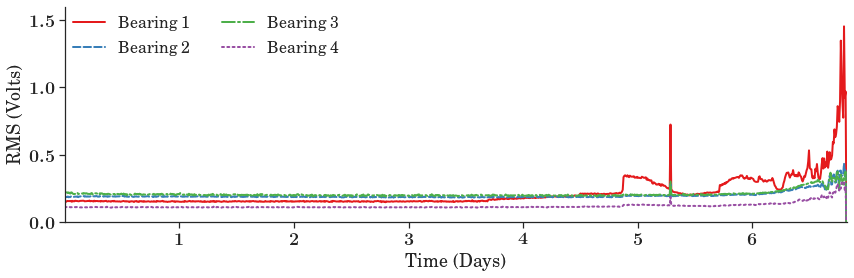

In [5]:
dateTime,rms_vals = plot_all_features('IMS2_Bearing1','RMS','RMS (Volts)')

In [8]:
np.save('data/full_dateTime.npy',dateTime)
np.save('data/full_rms.npy',rms_vals)


Select RMS.dateTime, RMS.values, assetId from dbt1.RMS
           where assetId = 'IMS2_Bearing1' order by RMS.dateTime asc;


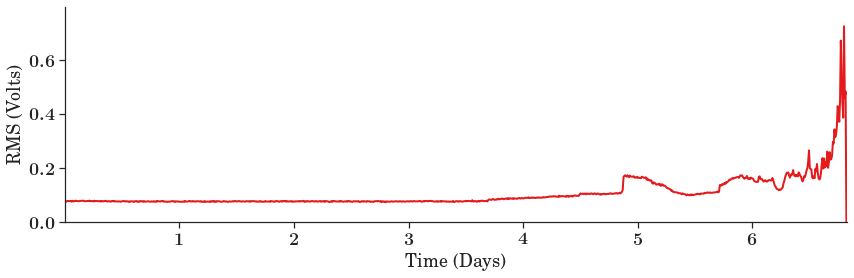

Select VibrationKurtosis.dateTime, VibrationKurtosis.values, assetId from dbt1.VibrationKurtosis
           where assetId = 'IMS2_Bearing1' order by VibrationKurtosis.dateTime asc;


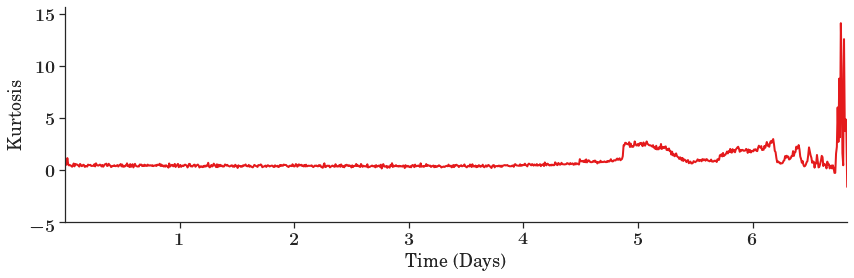

Select VibrationMean.dateTime, VibrationMean.values, assetId from dbt1.VibrationMean
           where assetId = 'IMS2_Bearing1' order by VibrationMean.dateTime asc;


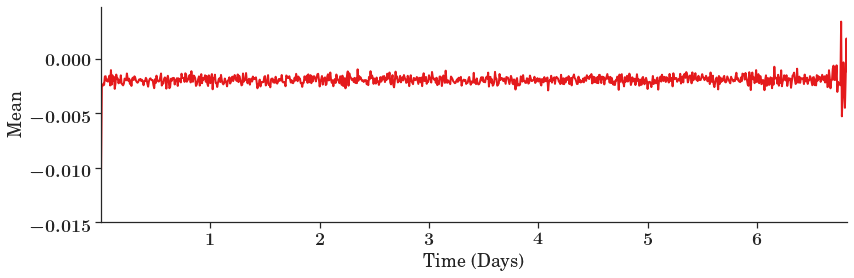

Select VibrationVariance.dateTime, VibrationVariance.values, assetId from dbt1.VibrationVariance
           where assetId = 'IMS2_Bearing1' order by VibrationVariance.dateTime asc;


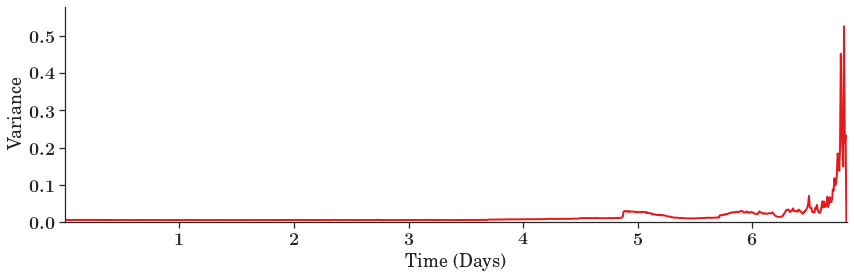

Select VibrationSkewness.dateTime, VibrationSkewness.values, assetId from dbt1.VibrationSkewness
           where assetId = 'IMS2_Bearing1' order by VibrationSkewness.dateTime asc;


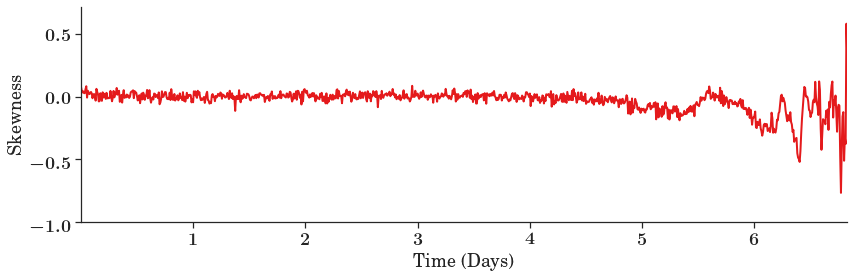

In [9]:
dateTime, rms = plot_features('IMS2_Bearing1','RMS','RMS (Volts)')

dateTime, kurtosis = plot_features('IMS2_Bearing1','VibrationKurtosis','Kurtosis')

dateTime, mean = plot_features('IMS2_Bearing1','VibrationMean','Mean')

dateTime, variance = plot_features('IMS2_Bearing1','VibrationVariance','Variance')

dateTime, skewness = plot_features('IMS2_Bearing1','VibrationSkewness','Skewness')


In [11]:
np.save('data/dateTime_individual.npy',dateTime)
np.save('data/rms_individual.npy',rms)
np.save('data/kurtosis_individual.npy',kurtosis)
np.save('data/mean_individual.npy',mean)
np.save('data/skewness_individual.npy',skewness)
np.save('data/variance_individual.npy',variance)

In [61]:
DF['dateTime'].values[0]

numpy.datetime64('2004-02-17T17:22:39.000000000')

In [9]:
def get_features(assetId,featureTable,Y_label):
    
    query = """Select """ + featureTable + """.dateTime, """ + featureTable + """.values, assetId from dbt1.""" + featureTable + """
           where assetId = '""" + assetId + """' order by """ + featureTable + """.dateTime asc;"""
    
    cursor = querier.execute_query(query)
    data=cursor.fetchall()
    
    # dateTime = np.array([[data[i][0] for i in range(len(data))]]).T
    dateTime = np.array([data[i][0] for i in range(len(data))])
    values = np.array([[data[i][1] for i in range(len(data))]]).T

    return dateTime,values

In [20]:
dateTime,values = get_features('IMS2_Bearing1','RMS','RMS (Volts)')


In [21]:
def timedelta_helper(timeValues,timeUnit):
    
    timeValues = timeValues.flatten().tolist()
    startTime = timeValues[0]
    
    if timeUnit.lower() == 'minutes':
        timeDivisor = 60
    elif timeUnit.lower() == 'hours':
        timeDivisor = 60 * 60
    elif timeUnit.lower() == 'days':
        timeDivisor = 60 * 60 * 24
    elif timeUnit.lower() == 'weeks':
        timeDivisor = 60 * 60 * 24 * 7
    
    timeValues = [(timeValues[i] - startTime).total_seconds()/timeDivisor for i in range(len(timeValues))]
    
    timeValues = np.array(timeValues)
    
    return timeValues

In [13]:
query = """SELECT FFT.sensorId, 
        FFT.dateTime AS dateTime, 
        FFT.values AS fftVals, 
        RMS.values AS rmsVals,
        VibrationState.values as vibState
        FROM dbt1.FFT
        INNER JOIN dbt1.RMS ON 
        dbt1.RMS.dateTime = dbt1.FFT.dateTime 
        and dbt1.RMS.assetId = 'IMS2_Bearing1' 
        
        LEFT JOIN dbt1.VibrationState ON 
        dbt1.VibrationState.dateTime = dbt1.FFT.dateTime 
        where FFT.dateTime < '2999-01-01 00:00:00.000000'
            and not exists 
            (SELECT VibrationState.values from dbt1.VibrationState WHERE VibrationState.dateTime = FFT.dateTime)
         
        and FFT.assetId = 'IMS2_Bearing1'
         
        order by FFT.dateTime asc ;"""

cursor = querier.execute_query(query)
data=cursor.fetchall()

In [14]:
sensorId = np.array([[data[i][0] for i in range(len(data))]]).T
dateTime = np.array([[data[i][1] for i in range(len(data))]]).T
fftVals = np.array([ast.literal_eval(data[i][2]) for i in range(len(data))])
rmsVals = np.array([[data[i][3] for i in range(len(data))]]).T
vibState = np.array([[data[i][4] for i in range(len(data))]]).T


In [15]:
fftVals.shape

(3950,)

In [21]:
np.array([ast.literal_eval(data[0][2].replace('\n',''))]).shape

(1, 4097)